In [2]:
from fastai.vision import *
from fastai.metrics import *
import scipy.io as io

In [6]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [4]:
path = Path('cars')

In [5]:
train = path/'cars_train'
test = path/'test'

In [8]:
labels = pd.read_csv(path/'anno_train.csv', header=None);labels.head()

,0,1,2,3,4,5
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [9]:
labels.columns = ["Image", "x1", "y1", "x2", "y2", "class"];labels.head()

,Image,x1,y1,x2,y2,class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [10]:
labels = labels.drop(['x1', 'y1', 'x2', 'y2'], axis=1)

In [7]:
names = pd.read_csv(path/'names.csv', header=None);names.head()

,0
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [8]:
names.columns = ["model"];names.head()

,model
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012


In [13]:
n_len = labels['class'].nunique();n_len

196

In [14]:
names.model.values[173] = "Ram CV Cargo Van Minivan 2012"

In [15]:
for i in names.model.unique():
    Path.mkdir(train/i, exist_ok=True)

In [33]:
for i in range(n_len):
    label = names.model.values[i]
    #label_imgs = labels.loc[labels['class'] == i+1]
    dst_pth = train/str(label)
    print(dst_pth)
    #for j in label_imgs.Image.values:
     #   current_pth = train/j
     #   os.rename(current_pth, dst_pth/j)

cars/train/AM General Hummer SUV 2000
cars/train/Acura RL Sedan 2012
cars/train/Acura TL Sedan 2012
cars/train/Acura TL Type-S 2008
cars/train/Acura TSX Sedan 2012
cars/train/Acura Integra Type R 2001
cars/train/Acura ZDX Hatchback 2012
cars/train/Aston Martin V8 Vantage Convertible 2012
cars/train/Aston Martin V8 Vantage Coupe 2012
cars/train/Aston Martin Virage Convertible 2012
cars/train/Aston Martin Virage Coupe 2012
cars/train/Audi RS 4 Convertible 2008
cars/train/Audi A5 Coupe 2012
cars/train/Audi TTS Coupe 2012
cars/train/Audi R8 Coupe 2012
cars/train/Audi V8 Sedan 1994
cars/train/Audi 100 Sedan 1994
cars/train/Audi 100 Wagon 1994
cars/train/Audi TT Hatchback 2011
cars/train/Audi S6 Sedan 2011
cars/train/Audi S5 Convertible 2012
cars/train/Audi S5 Coupe 2012
cars/train/Audi S4 Sedan 2012
cars/train/Audi S4 Sedan 2007
cars/train/Audi TT RS Coupe 2012
cars/train/BMW ActiveHybrid 5 Sedan 2012
cars/train/BMW 1 Series Convertible 2012
cars/train/BMW 1 Series Coupe 2012
cars/train/BMW

In [16]:
tfms = get_transforms(do_flip=False, max_lighting=0.4, flip_vert=False)

In [17]:
data = ImageDataBunch.from_folder(path, train = 'cars_train', test = None, valid_pct = 0.2, ds_tfms = tfms, size=224, bs = 54).normalize(imagenet_stats)

In [18]:
print(path)
print(train)

cars
cars/cars_train


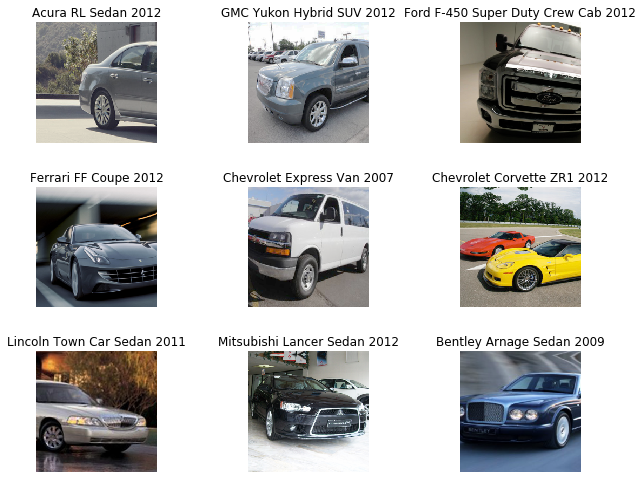

In [19]:
data.show_batch(3, figsize=(9, 7))

In [20]:
learn = create_cnn(data, models.resnet34, metrics = [error_rate, accuracy])

In [21]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,4.851742,3.798909,0.839681,0.160319
2,3.660359,3.312511,0.731573,0.268428


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


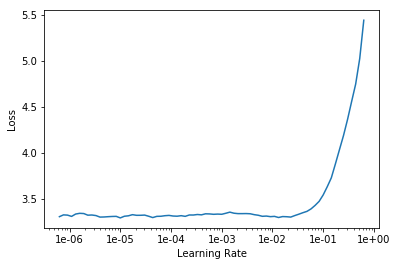

In [22]:
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,3.134997,2.568466,0.662162,0.337838
2,1.999821,1.525206,0.388206,0.611794


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


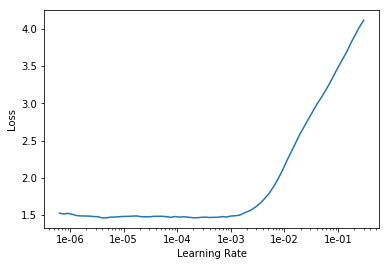

In [55]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.save('stage-1', path)

PosixPath('cars/models/stage-1.pth')

In [25]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.456419,1.462378,0.370393,0.629607
2,1.350274,1.383708,0.345823,0.654177
3,1.279462,1.326025,0.335381,0.664619
4,1.224977,1.319557,0.334767,0.665233


In [58]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (6516 items)
[Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012]...
Path: cars
x: ImageItemList (6516 items)
[Image (3, 194, 259), Image (3, 580, 800), Image (3, 315, 500), Image (3, 360, 480), Image (3, 300, 580)]...
Path: cars;

Valid: LabelList
y: CategoryList (1628 items)
[Category Chevrolet Tahoe Hybrid SUV 2012, Category Audi S4 Sedan 2012, Category Acura RL Sedan 2012, Category Aston Martin Virage Convertible 2012, Category HUMMER H3T Crew Cab 2010]...
Path: cars
x: ImageItemList (1628 items)
[Image (3, 225, 300), Image (3, 480, 640), Image (3, 480, 640), Image (3, 349, 645), Image (3, 768, 1024)]...
Path: cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, 

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


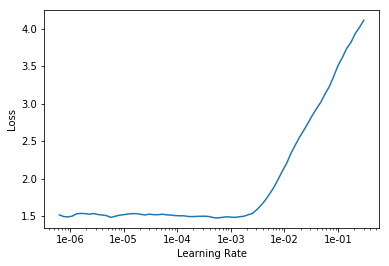

In [59]:
learn.lr_find()
learn.recorder.plot()

In [60]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.503330,1.579704,0.386364,0.613636
2,1.459982,1.573881,0.386364,0.613636


In [61]:
learn.save('stage-2')

In [62]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.887903,1.493368,0.391892,0.608108


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


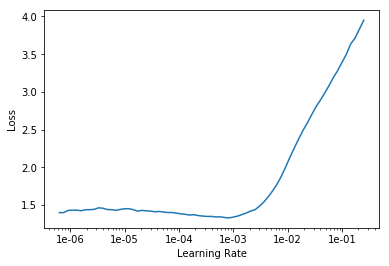

In [63]:
learn.lr_find()
learn.recorder.plot()

In [65]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.292250,1.386713,0.360565,0.639435
2,1.158800,1.276530,0.323096,0.676904
3,1.046984,1.214387,0.307740,0.692260
4,0.997321,1.210569,0.307125,0.692875


In [66]:
learn.save('stage-3')

In [67]:
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.625553,1.928858,0.511056,0.488943
2,1.031188,1.006980,0.288698,0.711302


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


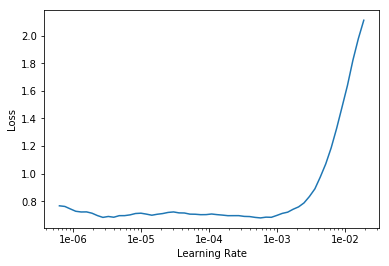

In [68]:
learn.lr_find()
learn.recorder.plot()

In [69]:
learn.save('stage-4')

In [70]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.662818,0.964442,0.269656,0.730344
2,0.610986,0.906467,0.250000,0.750000
3,0.560573,0.885553,0.251229,0.748771
4,0.538342,0.873462,0.248157,0.751843


In [71]:
learn.save('stage-5')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


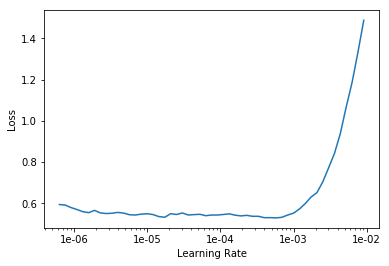

In [72]:
learn.lr_find()
learn.recorder.plot()

In [73]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.530304,0.859323,0.238943,0.761056
2,0.488666,0.845777,0.227887,0.772113


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


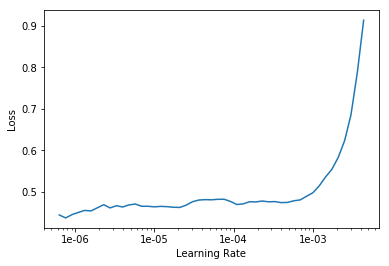

In [74]:
learn.save('stage-6')
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


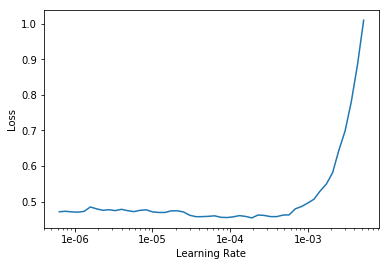

In [75]:
learn.load('stage-6')
learn.lr_find()
learn.recorder.plot()

In [76]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.476183,0.827889,0.226044,0.773956
2,0.410572,0.807158,0.226044,0.773956


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


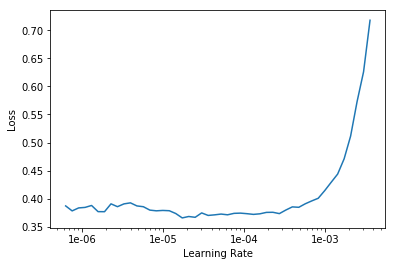

In [77]:
learn.lr_find()
learn.recorder.plot()

In [78]:
learn.save('stage-7')
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.260073,1.662899,0.446560,0.553440
2,0.771241,0.849144,0.241400,0.758600


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


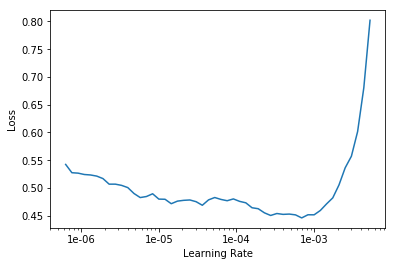

In [79]:
#learn.load('stage-7')
learn.lr_find()
learn.recorder.plot()

In [80]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.472039,0.821591,0.240172,0.759828
2,0.421813,0.778610,0.218059,0.781941
3,0.376912,0.764085,0.220516,0.779484
4,0.367433,0.759601,0.222359,0.777641


In [81]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


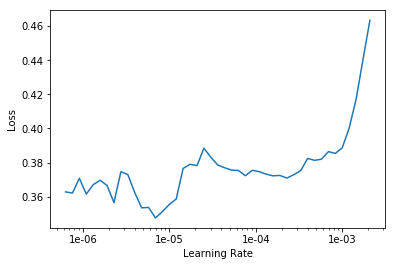

In [82]:
learn.recorder.plot()

In [83]:
learn.save('stage-9')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


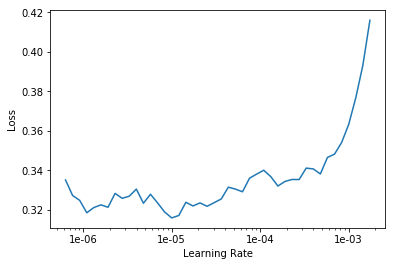

In [84]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


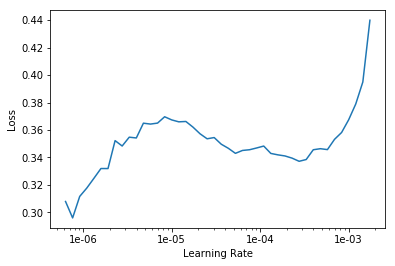

In [85]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [86]:
learn.load('stage-9')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (6516 items)
[Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012]...
Path: cars
x: ImageItemList (6516 items)
[Image (3, 194, 259), Image (3, 580, 800), Image (3, 315, 500), Image (3, 360, 480), Image (3, 300, 580)]...
Path: cars;

Valid: LabelList
y: CategoryList (1628 items)
[Category Chevrolet Tahoe Hybrid SUV 2012, Category Audi S4 Sedan 2012, Category Acura RL Sedan 2012, Category Aston Martin Virage Convertible 2012, Category HUMMER H3T Crew Cab 2010]...
Path: cars
x: ImageItemList (1628 items)
[Image (3, 225, 300), Image (3, 480, 640), Image (3, 480, 640), Image (3, 349, 645), Image (3, 768, 1024)]...
Path: cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, 

In [87]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


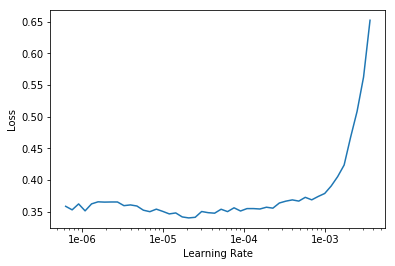

In [88]:
learn.recorder.plot()

In [89]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.358691,0.757462,0.221744,0.778256


In [91]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


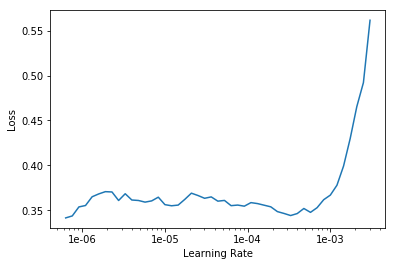

In [92]:
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


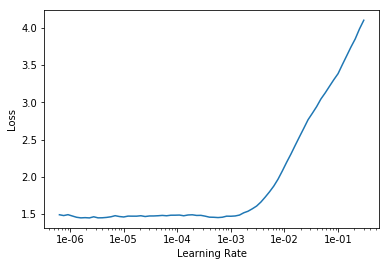

In [31]:
learn.load('stage-1')
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy
1,2.887183,2.831412,0.723587,0.276413
2,1.883648,1.432868,0.364865,0.635135


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


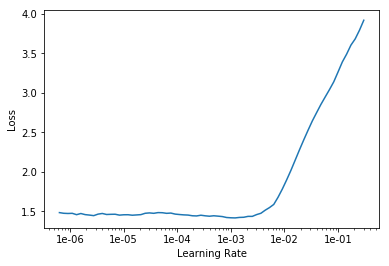

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy
1,2.078068,1.532893,0.401106,0.598894


In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


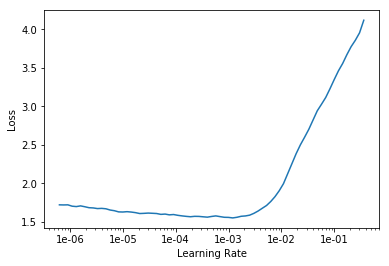

In [36]:
learn.recorder.plot()

In [37]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy
1,1.584917,1.432841,0.356265,0.643735
2,1.478994,1.396534,0.349509,0.650491


In [40]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.919546,0.941533,0.259214,0.740786


In [41]:
learn.save('final', path)

PosixPath('cars/models/final.pth')

In [42]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.835224,0.882767,0.248157,0.751843


In [46]:
learn.load('final')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (6516 items)
[Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012, Category BMW 1 Series Convertible 2012]...
Path: cars
x: ImageItemList (6516 items)
[Image (3, 800, 1280), Image (3, 194, 259), Image (3, 315, 500), Image (3, 425, 640), Image (3, 300, 580)]...
Path: cars;

Valid: LabelList
y: CategoryList (1628 items)
[Category Buick Verano Sedan 2012, Category Plymouth Neon Coupe 1999, Category Ford Expedition EL SUV 2009, Category Dodge Caravan Minivan 1997, Category Nissan Juke Hatchback 2012]...
Path: cars
x: ImageItemList (1628 items)
[Image (3, 500, 800), Image (3, 1054, 1279), Image (3, 346, 516), Image (3, 449, 600), Image (3, 938, 1500)]...
Path: cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


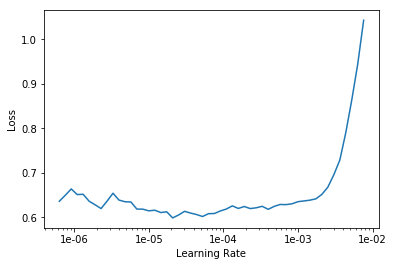

In [47]:
learn.lr_find()
learn.recorder.plot()

In [48]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.757486,0.873076,0.241400,0.758600


In [49]:
learn.load('final')
interpret = ClassificationInterpretation.from_learner(learn)

In [51]:
interpret.most_confused(min_val=2)

[('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 6),
 ('Mercedes-Benz S-Class Sedan 2012', 'Mercedes-Benz E-Class Sedan 2012', 6),
 ('Audi TT RS Coupe 2012', 'Audi R8 Coupe 2012', 5),
 ('Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  'Chevrolet Silverado 1500 Extended Cab 2012',
  5),
 ('Audi 100 Wagon 1994', 'Audi 100 Sedan 1994', 4),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 4),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 3),
 ('Bentley Continental GT Coupe 2007',
  'Bentley Continental Flying Spur Sedan 2007',
  3),
 ('Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 3),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 3),
 ('Chevrolet Corvette ZR1 2012', 'Chevrolet Corvette Convertible 2012', 3),
 ('Chevrolet Silverado 1500 Regular Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  3),
 ('Dodge Sprinter Cargo Van 2009', 'Mercedes-Benz Sprinter Van 2012', 3),
 ('GMC Savana Van 2012', 'Chevr